# Análise exploratória de dados

Após o tratamento dos dados, passamos para a etapa inicial de análise dos dados procurando por características importantes presentes nos dados e avaliando hipóteses criadas sobre as variáveis presentes. Nossa principal variável de interesse será a nota média de cada aluno, iniciaremos procurando entender como ela se relaciona com as demais variáveis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
df = pd.read_csv('data/MICRODADOS_ENEM_SP_2019.csv', encoding = 'latin1')

## Análise de dados faltantes

Entre os campos que possuímos, iremos olhar se existem linhas faltando informação e procurar por padrões que possivelmente expliquem a ausência.

In [3]:
print('Colunas com NANs e a taxa de NANs:')
nan_tx = list(df.isna().mean())
for i, col in enumerate(df.columns):
    if nan_tx[i] > 0:
        print('\t' + col + ': ' + str(np.round(nan_tx[i]*100, 2)) + '%')

Colunas com NANs e a taxa de NANs:
	NO_MUNICIPIO_NASCIMENTO: 2.42%
	SG_UF_NASCIMENTO: 2.42%
	TP_ENSINO: 44.41%
	CO_ESCOLA: 73.05%
	NO_MUNICIPIO_ESC: 73.05%
	SG_UF_ESC: 73.05%
	TP_DEPENDENCIA_ADM_ESC: 73.05%
	TP_LOCALIZACAO_ESC: 73.05%
	TP_SIT_FUNC_ESC: 73.05%
	NU_NOTA_CN: 28.41%
	NU_NOTA_CH: 23.73%
	NU_NOTA_LC: 23.73%
	NU_NOTA_MT: 28.41%
	TP_STATUS_REDACAO: 23.73%
	NU_NOTA_COMP1: 23.73%
	NU_NOTA_COMP2: 23.73%
	NU_NOTA_COMP3: 23.73%
	NU_NOTA_COMP4: 23.73%
	NU_NOTA_COMP5: 23.73%
	NU_NOTA_REDACAO: 23.73%


Cerca de 74% dos participantes não responderam informações sobre a escola em que estudam, isso é uma taxa bastante alta de informações que seriam úteis.

Além disso, a nota do aluno não está presenta para cerca de 24% dos alunos, informação que seria útil para realizar o treinamento de modelos. Vamos verificar se os alunos que estão com os campos sem notas foram alunos que faltaram no dia de aplicação da prova.

In [4]:
for prova in ['CN', 'MT', 'LC','CH']:
    missing_and_abscence = df[(df['NU_NOTA_'+prova].isna()) & (df['TP_PRESENCA_'+prova] == 0)].shape[0]
    missing = df[(df['NU_NOTA_'+prova].isna())].shape[0]
    print(f'Prova: {prova}')
    print(f'Notas ausentes e alunos que faltaram na aplicação : {100*missing_and_abscence/df.shape[0]:.2f}%')
    print(f'Notas ausentes: {100*missing/df.shape[0]:.2f}%')

Prova: CN
Notas ausentes e alunos que faltaram na aplicação : 28.37%
Notas ausentes: 28.41%
Prova: MT
Notas ausentes e alunos que faltaram na aplicação : 28.37%
Notas ausentes: 28.41%
Prova: LC
Notas ausentes e alunos que faltaram na aplicação : 23.64%
Notas ausentes: 23.73%
Prova: CH
Notas ausentes e alunos que faltaram na aplicação : 23.64%
Notas ausentes: 23.73%


Os campos ausentes na nota dos alunos representam alunos que não estavam presentes no dia da aplicação da prova, __28,37% dos inscritos faltaram no dia das provas de ciências humanas, linguagens e redação e 23,64% faltaram no dia das provas de ciências exatas e matemática__.

Vamos agora verificar se existe alguma característica comum entre os alunos que não apresentaram os dados sobre a instituição de ensino.

Porcentagem com algum dado da instituição de ensino ausente: 74.32%


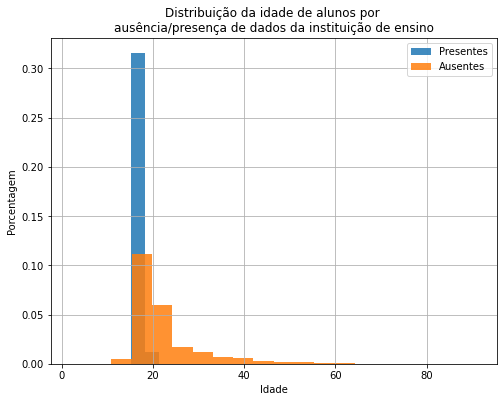

In [5]:
df['ESCOLA_FALTANTE'] = ((df.TP_ENSINO.isna()) | (df.CO_ESCOLA.isna()) | (df.NO_MUNICIPIO_ESC.isna()) | 
                         (df.SG_UF_ESC.isna()) | (df.TP_DEPENDENCIA_ADM_ESC.isna()) | (df.TP_LOCALIZACAO_ESC.isna()) | 
                         (df.TP_SIT_FUNC_ESC.isna()))
print(f'Porcentagem com algum dado da instituição de ensino ausente: {df.ESCOLA_FALTANTE.mean()*100:.2f}%')

fig = plt.figure(figsize = (8, 6))
plt.hist(df[df.ESCOLA_FALTANTE == False].NU_IDADE, bins = 20, density= True, alpha = 0.85, label = 'Presentes')
plt.hist(df[df.ESCOLA_FALTANTE == True].NU_IDADE, bins = 20, density= True, alpha = 0.85, label = 'Ausentes')
plt.title('Distribuição da idade de alunos por \nausência/presença de dados da instituição de ensino')
plt.grid()
plt.xlabel('Idade')
plt.ylabel('Porcentagem')
plt.legend()
plt.show()

Podemos notar que a distribuição das idades dos participantes apresenta diferenças entre o grupo que apresentou os dados da instituição de ensino ou não, __os participantes que apresentaram as informações são considerávelmente mais novos__. Podemos considerar que parte desses participantes que não apresentaram as informações não tivessem mais elas pelo tempo desde a idade escolar.

## Relação de idade e gênero com a nota

Agora considerando os alunos sem notas faltantes, verifiquemos se a distribuição da nota média possui relação com a idade e o gênero.

Idade média dos participantes: 20.91
Porcentagem de participantes do sexo feminino: 59.00%
Idade média dos participantes do sexo feminino:  20.86 ± 6.96
Idade média dos participantes do sexo masculino: 20.98 ± 6.81


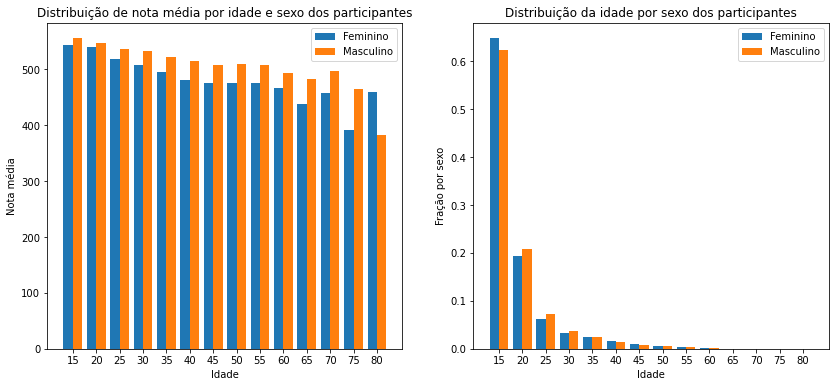

In [33]:
df['NU_NOTA'] = 0.2*(df.NU_NOTA_CH + df.NU_NOTA_CN + df.NU_NOTA_LC + df.NU_NOTA_MT + df.NU_NOTA_REDACAO)
print(f'Idade média dos participantes: {df.NU_IDADE.mean():.2f}')
fem_frac = (df.TP_SEXO == 'F').mean()
age_mean_fem = df[df.TP_SEXO == 'F'].NU_IDADE.mean()
age_mean_masc = df[df.TP_SEXO == 'M'].NU_IDADE.mean()
age_std_fem = df[df.TP_SEXO == 'F'].NU_IDADE.std()
age_std_masc = df[df.TP_SEXO == 'M'].NU_IDADE.std()

print(f'Porcentagem de participantes do sexo feminino: {fem_frac*100:.2f}%')
print(f'Idade média dos participantes do sexo feminino:  {age_mean_fem:.2f} ± {age_std_fem:.2f}')
print(f'Idade média dos participantes do sexo masculino: {age_mean_masc:.2f} ± {age_std_masc:.2f}')
age_intervals = [[i, i+5] for i in range(15,85, 5)]
age_intervals[-1][1] = 150
masc = np.zeros(shape = len(age_intervals))
masc_hist = np.zeros(shape = len(age_intervals))
fem = np.zeros(shape = len(age_intervals))
fem_hist = np.zeros(shape = len(age_intervals))
for i in range(len(age_intervals)):
    age_sup = age_intervals[i][1]
    age_inf = age_intervals[i][0]
    masc[i] = df[(df.TP_SEXO == 'M') & (df.NU_IDADE >= age_inf) & (df.NU_IDADE < age_sup)].NU_NOTA.mean()
    fem[i] = df[(df.TP_SEXO == 'F') & (df.NU_IDADE >= age_inf) & (df.NU_IDADE < age_sup)].NU_NOTA.mean()
    masc_hist[i] = df[(df.TP_SEXO == 'M') & (df.NU_IDADE >= age_inf) & (df.NU_IDADE < age_sup)].shape[0]
    fem_hist[i] = df[(df.TP_SEXO == 'F') & (df.NU_IDADE >= age_inf) & (df.NU_IDADE < age_sup)].shape[0]
fig, ax = plt.subplots(ncols = 2, figsize = (14, 6))
ax[0].bar([i[0]-1 for i in age_intervals], fem, width = 2,label = 'Feminino')
ax[0].bar([i[0]+1 for i in age_intervals], masc, width = 2,  label = 'Masculino')
ax[0].set_xticks([i[0] for i in age_intervals])
ax[0].set_title('Distribuição de nota média por idade e sexo dos participantes')
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Nota média')
ax[0].legend()


ax[1].bar([i[0]-1 for i in age_intervals], fem_hist/fem_hist.sum(), width = 2, label = 'Feminino')
ax[1].bar([i[0]+1 for i in age_intervals], masc_hist/masc_hist.sum(), width = 2, label = 'Masculino')
ax[1].set_xticks([i[0] for i in age_intervals])
ax[1].set_title('Distribuição da idade por sexo dos participantes')
ax[1].set_xlabel('Idade')
ax[1].set_ylabel('Fração por sexo')
ax[1].legend()
plt.show()

## Atendimendo especializado

A aplicação da prova pode ser acompanhada por atendimento especializado caso o participante possua alguma necessidade especial. Inicialmente iremos olhar pela quantidade de participantes que possuem necessidades especiais e se há diferença na nota média entre os que possuem e os que não possuem.

In [46]:
columns_special_need = [x for x in df.columns if x[0:2] == 'IN']
columns_special_need.remove('IN_TREINEIRO')
d_special = {}
d_special_count = {}
for col in columns_special_need:
    d_special[col] = df[df[col] == 1].NU_NOTA.mean()
    d_special_count[col] = df[df[col] == 1].shape[0]

Atendimentos especializados com média maior do que a média geral:
 DEFICIT ATENCAO
 DISLEXIA
 OUTRA DEF
 TEMPO ADICIONAL
 MESA CADEIRA SEPARADA
 COMPUTADOR
 CADEIRA ESPECIAL
 CADEIRA ACOLCHOADA
 MOBILIARIO OBESO
 LAMINA OVERLAY
 PROTETOR AURICULAR
 MEDIDOR GLICOSE
 MARCA PASSO
 MEDICAMENTOS
 SALA INDIVIDUAL
 SALA ESPECIAL
 MOBILIARIO ESPECIFICO
 MATERIAL ESPECIFICO
 NOME SOCIAL


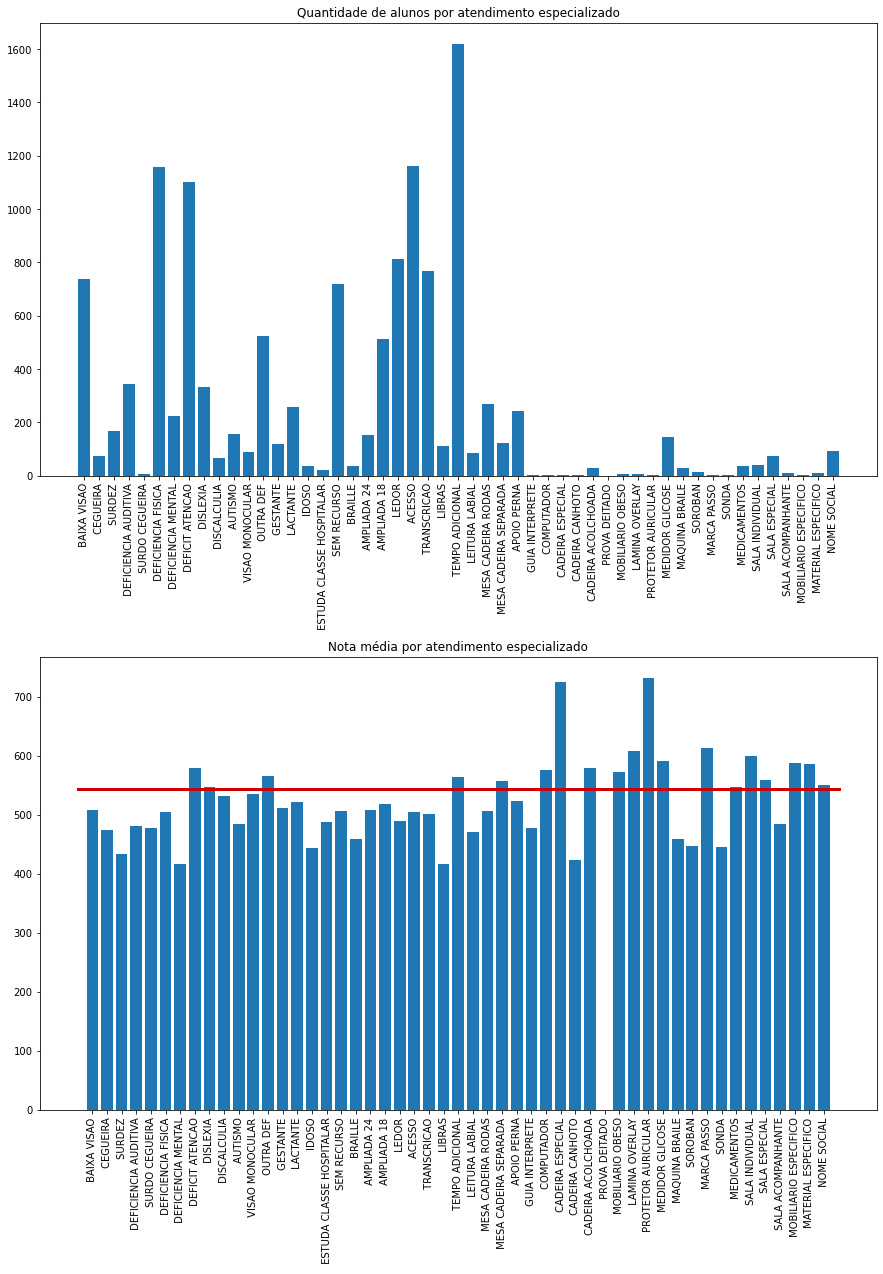

In [69]:
fig, ax = plt.subplots(nrows = 2, figsize = (15, 20))
print("Atendimentos especializados com média maior do que a média geral:")
print("\n".join([col[2:].replace('_', ' ') for col in columns_special_need if d_special[col] > df.NU_NOTA.mean()]))
ax[1].bar(list(range(len(d_special))), [d_special[col] for col in columns_special_need])
ax[1].plot([-1, len(d_special)], [df.NU_NOTA.mean(), df.NU_NOTA.mean()], linewidth = 3, c = "#CC0000")
ax[1].set_xticks(ticks = list(range(len(d_special))))
ax[1].set_xticklabels(labels = [col[2:].replace('_', ' ') for col in columns_special_need], rotation = 90)
ax[1].set_title('Nota média por atendimento especializado')

ax[0].bar(list(range(len(d_special))), [d_special_count[col] for col in columns_special_need])
ax[0].set_xticks(ticks = list(range(len(d_special))))
ax[0].set_xticklabels(labels = [col[2:].replace('_', ' ') for col in columns_special_need], rotation = 90)
ax[0].set_title('Quantidade de alunos por atendimento especializado')
plt.subplots_adjust(hspace = 0.4)
plt.show()